In [93]:
import pandas as pd
import numpy as np
import calendar
import os
import re
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Merging 12 months of sales data into single dataframe

In [61]:
# Getting list of all files in Sales_Data folder, then storing it in a list
files = []
for file in os.listdir('./Sales_Data'):
    files.append(file)

# Creating a blank dataframe
df = pd.DataFrame() 

# For each file in list of files, create a temp dataframe, then concat it to the blank dataframe
for file in files:
    month_df = pd.read_csv('./Sales_Data/' + file)
    df = pd.concat([df, month_df])
    
# Show all rows of nan data
nan_df = df[df.isna().any(axis=1)]
# Drop null values
df = df.dropna(how='all')

# df.to_csv('all_months.csv', index=False)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Questions

#### 1. Best month for sales & how much earn during that month

In [70]:
# Creating a 'Month' column
df['Month'] = df['Order Date'].str[0:2]

# There are some rows with dummy data where the rows are just filled with column names
# Dropping those data here
df = df[df['Month'] != 'Or']

# Converting 'Month' column to integer type
# df['Month'] = df['Month'].astype('int32')
df['Month'] = df['Month'].apply(lambda x : int(x))

# Creating a word format column of 'Month'
df['Month_Word'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Word
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Apr
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Apr


In [84]:
# Converting 'Price Each' & 'Quantity Ordered' column to float value
df['Price Each'] = df['Price Each'].apply(lambda x : float(x))
df['Quantity Ordered'] = df['Quantity Ordered'].apply(lambda x : int(x))

# Creating a 'Sales' column where Sales = Quantity Order * Price Each
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Word,Price,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Apr,11.95,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Apr,99.99,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Apr,11.99,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Apr,11.99,11.99


<BarContainer object of 12 artists>

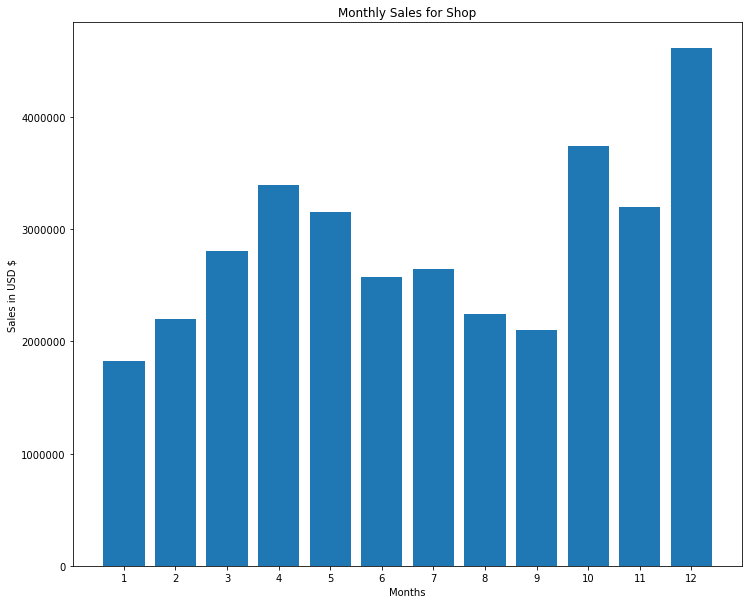

In [115]:
# Using a group by see the best performing month for sales
results = df[['Month', 'Sales']].groupby(by='Month').sum().round(5).reset_index()
# .sort_values(by='Sales', ascending=False)


months = range(1,13)

# Plotting the bar chart
plt.figure(figsize=(12,10))
plt.xticks(months)
plt.ticklabel_format(style='plain')
plt.xlabel('Months')
plt.ylabel('Sales in USD $')
plt.title('Monthly Sales for Shop')
plt.bar(results['Month'], results['Sales'])

#### 2. What city have the highest number of sales?

In [126]:
# Creating a city column - Will need to extract city out of 'Purchase Address'
# Format is street, city, state postal code
# Using split will split the string into 3 different strings using ',' as separator
# Then indexing [1] takes the second string
df['City'] = df['Purchase Address'].apply(lambda x : x.split(',')[1])
df['State'] = df['Purchase Address'].apply(lambda x : x.split(',')[2][1:3])

# Combining 'City' with 'State'
df['City'] = df['City'] + ' ' + df['State']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Word,Price,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Apr,11.95,23.90,Dallas TX,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Apr,99.99,99.99,Boston MA,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00,600.00,Los Angeles CA,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Apr,11.99,11.99,Los Angeles CA,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Apr,11.99,11.99,Los Angeles CA,CA


<BarContainer object of 10 artists>

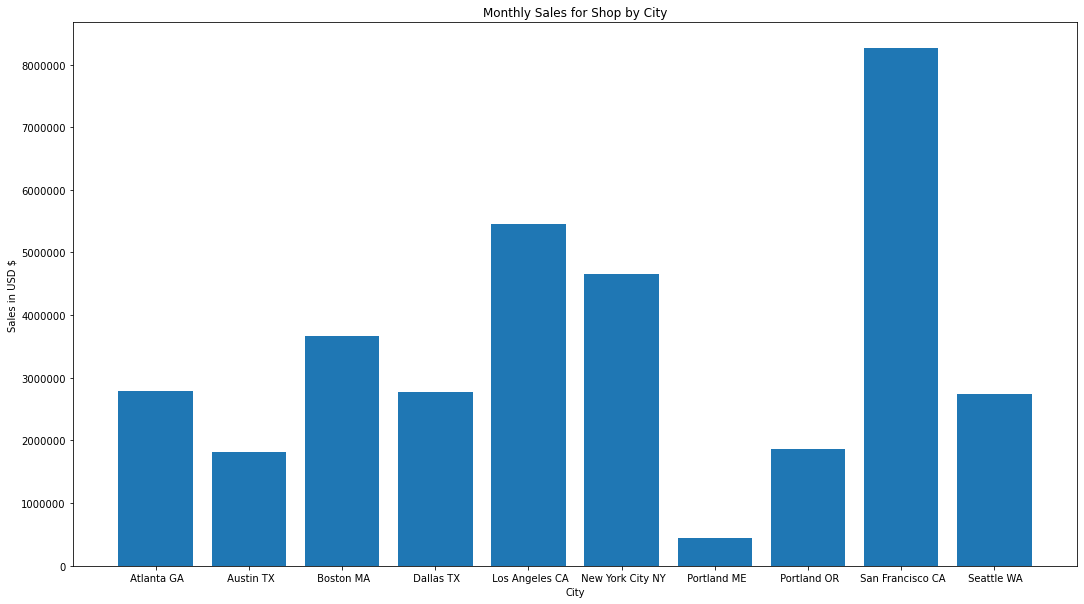

In [129]:
# Using a group by see the best performing month for sales
results = df[['City', 'Sales']].groupby(by='City').sum().round(5).reset_index()
# .sort_values(by='Sales', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(18,10))
plt.ticklabel_format(style='plain')
plt.xlabel('City')
plt.ylabel('Sales in USD $')
plt.title('Monthly Sales for Shop by City')
plt.bar(results['City'], results['Sales'])

#### 3. What time should we display our advertisements?

In [153]:
# Method 1
# Creating 'Order Time' column via string.split()
df["Order Time"] = df['Order Date'].apply(lambda x : x.split('/')[2][3:9])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Word,Price,Sales,City,State,Order Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Apr,11.95,23.90,Dallas TX,TX,08:46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Apr,99.99,99.99,Boston MA,MA,22:30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00,600.00,Los Angeles CA,CA,14:38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Apr,11.99,11.99,Los Angeles CA,CA,14:38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Apr,11.99,11.99,Los Angeles CA,CA,09:27


In [154]:
# Method 2 - Preferred Method
# Converting this column into a datetime column
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Word,Price,Sales,City,State,Order Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Apr,11.95,23.90,Dallas TX,TX,08:46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Apr,99.99,99.99,Boston MA,MA,22:30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00,600.00,Los Angeles CA,CA,14:38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,11.99,11.99,Los Angeles CA,CA,14:38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Apr,11.99,11.99,Los Angeles CA,CA,09:27


In [156]:
# Creating a 'Hour' column using .dt.hour
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Word,Price,Sales,City,State,Order Time,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Apr,11.95,23.90,Dallas TX,TX,08:46,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Apr,99.99,99.99,Boston MA,MA,22:30,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00,600.00,Los Angeles CA,CA,14:38,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,11.99,11.99,Los Angeles CA,CA,14:38,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Apr,11.99,11.99,Los Angeles CA,CA,09:27,9


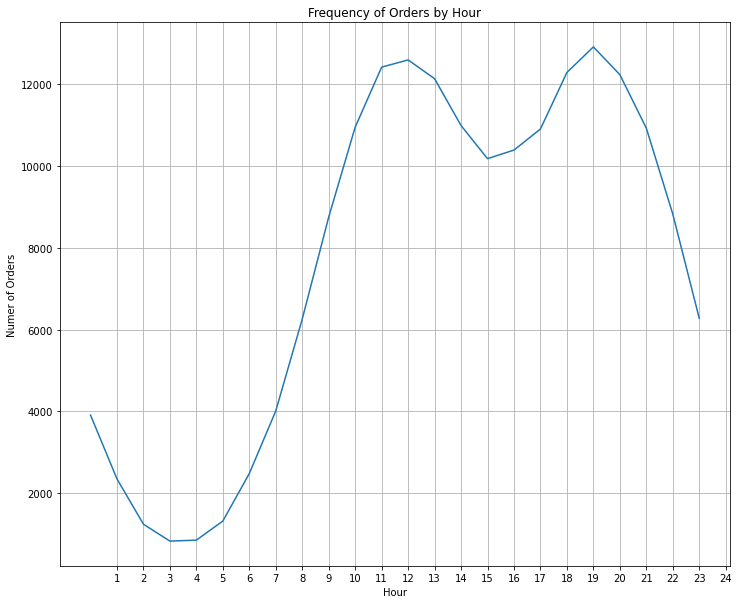

In [176]:
# Using a group by see the best performing month for sales
results = df.groupby(by='Hour').count()
# .sort_values(by='Sales', ascending=False)

hours = range(1,25)
# Plotting the bar chart
plt.figure(figsize=(12,10))
plt.grid()
plt.xticks(hours)
plt.ticklabel_format(style='plain')
plt.xlabel('Hour')
plt.ylabel('Numer of Orders')
plt.title('Frequency of Orders by Hour')
plt.plot(results['Order ID'])

#### 4. What products are most frequently sold together?

In [203]:
# Method 1
# Filter out 'Order ID' & 'Products'
products = df[['Order ID', 'Product']]

# Using groupby to concatenate 'Product' under the same 'Order ID'
# 'Products' will be separated by a ',' in the same column
# Will result in duplicates, so drop the duplicates, keeping the first unique row
products['Product'] = df[['Order ID', 'Product']].groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
products = products.drop_duplicates(keep='first')
products.head()

<ipython-input-203-6eb87b5690cb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['Product'] = df[['Order ID', 'Product']].groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))


,Order ID,Product
0,176558,USB-C Charging Cable
2,176559,Bose SoundSport Headphones
3,176560,"Google Phone,Wired Headphones"
5,176561,Wired Headphones
6,176562,USB-C Charging Cable


In [204]:
# Using a second groupby on, this time by 'Product' and doing a count()
# Sorting by top counts
results = products.groupby(by='Product').count().reset_index().sort_values(by='Order ID', ascending=False)

# Since question wants items that are bought toegheter and 'Products' 
# are separated by a comma, we'll want to filter out only those 'Products' that contain ','
results = results[results['Product'].str.contains(',')]
results.head(10)

,Product,Order ID
361,"iPhone,Lightning Charging Cable",882
183,"Google Phone,USB-C Charging Cable",856
382,"iPhone,Wired Headphones",361
316,"Vareebadd Phone,USB-C Charging Cable",312
201,"Google Phone,Wired Headphones",303
353,"iPhone,Apple Airpods Headphones",286
173,"Google Phone,Bose SoundSport Headphones",161
322,"Vareebadd Phone,Wired Headphones",104
194,"Google Phone,USB-C Charging Cable,Wired Headph...",77
309,"Vareebadd Phone,Bose SoundSport Headphones",60


In [210]:
# Method 2
# Create a new dataframe with only 'Order ID' that are duplicated
dups = df[df['Order ID'].duplicated(keep=False)]

# Explanation same as Method 1
dups['Grouped'] = dups.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
dups = dups[['Order ID', 'Grouped']].drop_duplicates(keep='first')
dups.head()

<ipython-input-210-4407919117db>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dups['Grouped'] = dups.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [217]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dups['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### 5. What product sold the most? Why do you think it sold the most?

<BarContainer object of 19 artists>

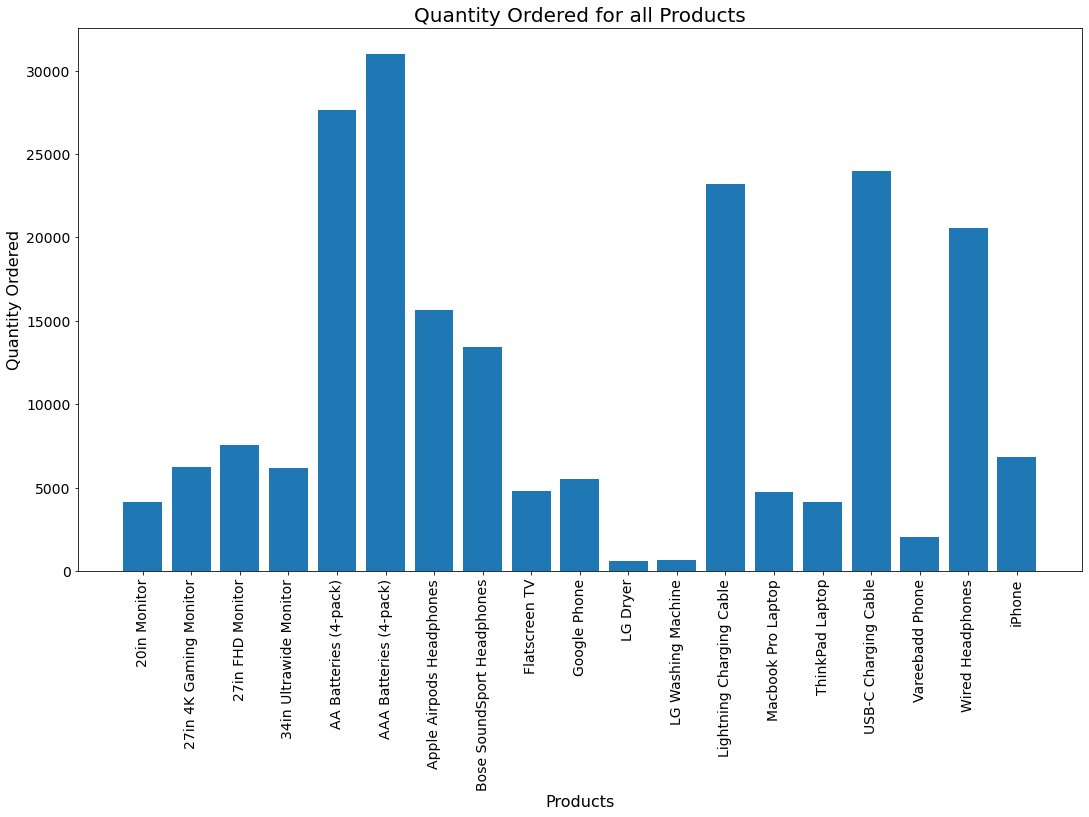

In [268]:
data = df[['Quantity Ordered', 'Product']].groupby('Product').sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(18,10))
plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.ticklabel_format(style='plain')
plt.xlabel('Products', size=16)
plt.ylabel('Quantity Ordered', size=16)
plt.title('Quantity Ordered for all Products', size=20)
plt.bar(data['Product'], data['Quantity Ordered'])

In [269]:
prices = df[['Product', 'Price Each']].groupby('Product').mean().reset_index()

Text(0, 0.5, 'Price')

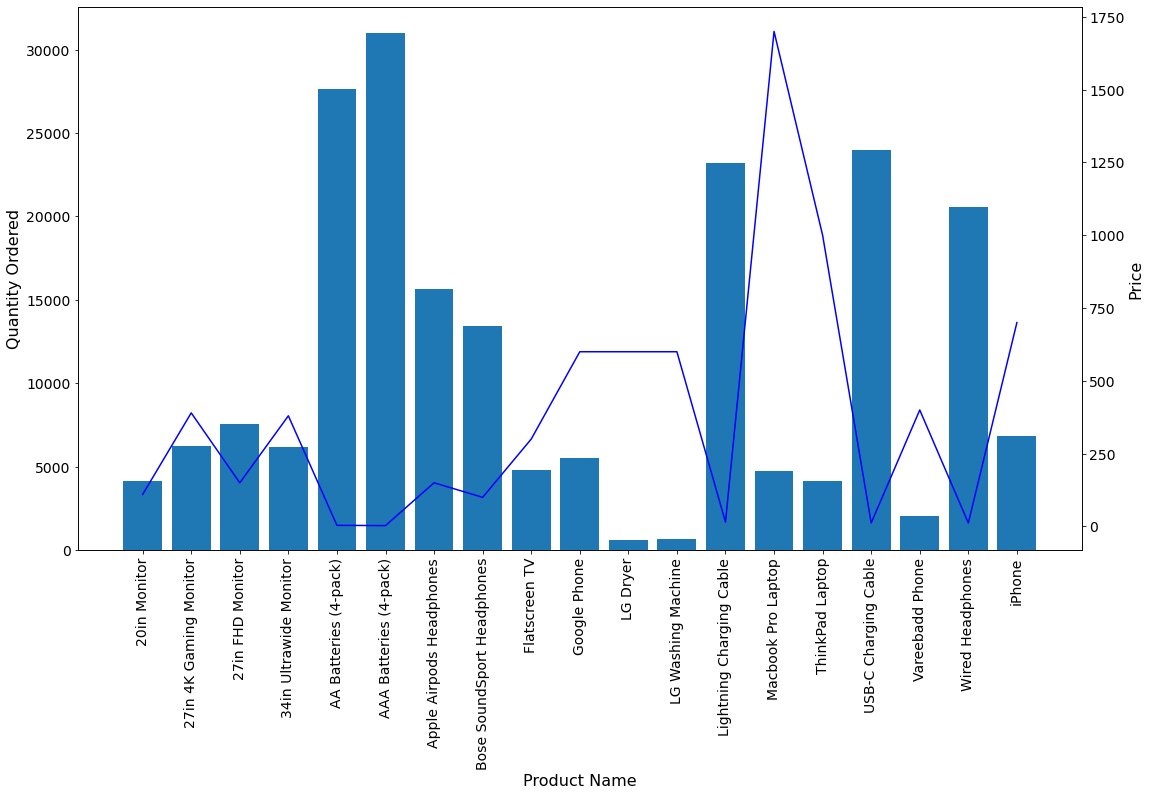

In [270]:
fig, ax1 = plt.subplots(figsize=(18,10))
plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)

ax2 = ax1.twinx()
plt.yticks(size=14)

ax1.bar(data['Product'], data['Quantity Ordered'])
ax2.plot(prices['Product'], prices['Price Each'], 'b-')

ax1.set_xlabel('Product Name', size=16)
ax1.set_ylabel('Quantity Ordered', size=16)
ax2.set_ylabel('Price', size=16)